<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Curve-Fitting">Curve Fitting</a></li>
<ol><li><a class="" href="#Linear-Regression">Linear Regression</a></li>
<ol><li><a class="" href="#Example">Example</a></li>
<li><a class="" href="#Some-Definitions">Some Definitions</a></li>
<li><a class="" href="#Making-A-Function">Making A Function</a></li>
<ol><li><a class="" href="#Standard-Diviation-in-Data">Standard Diviation in Data</a></li>
<li><a class="" href="#Standard-Error">Standard Error</a></li>
<li><a class="" href="#Correlation-Coefficient">Correlation Coefficient</a></li>
</ol><li><a class="" href="#Example">Example</a></li>
<li><a class="" href="#Making-A-Function">Making A Function</a></li>
</ol><li><a class="" href="#Polynomial-Regression">Polynomial Regression</a></li>
<ol><li><a class="" href="#Statistics">Statistics</a></li>
<li><a class="" href="#Implementing-Polynomial-Regression">Implementing Polynomial Regression</a></li>
</ol><li><a class="" href="#Generalizing-Polynomial-Regression-to-$m^{th}$-Order">Generalizing Polynomial Regression to $m^{th}$ Order</a></li>
<ol><li><a class="" href="#Statistics">Statistics</a></li>
<li><a class="" href="#Making-A-Function">Making A Function</a></li>
</ol><li><a class="" href="#Nonlinear-Regression">Nonlinear Regression</a></li>
</ol>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Curve Fitting

* **Regression:** Data exhibit a significant degree of scatter. The strategy is to derive a single
curve that represents the general trend of the data.
* **Interpolation:** Data is very precise. The strategy is to pass a curve or a series of curves
through each of the points.


## Linear Regression

In linear regression we assume that there is approximately a linear
relationship between X and Y where Y is the equantity we are trying to predict using X. Mathematicaly, we can write the equation of the line as:
$$ Y = a_0 + a_1 X +\epsilon $$
We will sometimes
describe this by saying that we are regressing Y on X (or Y onto X). In above $a_0$ and $a_1$ are two unknown constants that represent
the intercept and slope terms in the linear model. Together, $a_0$ and $a_1$ are
intercept
known as the model *coefficients* or *parameters*. Once we have the coefficients, we can use them to predict Y.

Let $ \hat{y_i} = a_0 + a_1 $ be the predictions for the $i$th observation. We define the residual as
$ e_i = y_i - \hat{y_i} $ then the sum of the squares of the residuals is
$$ RSS =  \sum_{i=1}^n (e_i)^2 = \sum_{i=1}^n (y_i - \hat{y_i})^2 $$
Using calculus, we can show that the sum of the squares of the residuals is minized when
$$
\begin{align*}
a_0 &= \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
a_1 &= \bar{y} - a_1\bar{x} \\
\end{align*}
$$
Here, $\bar{x}$ and $\bar{y}$ are the mean values of $x_i$ and $y_i$ respectively.

### Example

In [27]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams["font.size"] = 16
plt.style.use('default')

In [12]:
Y = np.array([0.5,2.5,2.0,4,3.5,6,5.5])
X = np.arange(1,8)

In [13]:
xmean = np.mean(X)
ymean = np.mean(Y)
variane = np.sum((X-xmean)**2)
beta1 = np.sum((X-xmean)*(Y-ymean))/variane
beta0 = ymean - beta1*xmean
beta0, beta1

(0.07142857142857117, 0.8392857142857143)

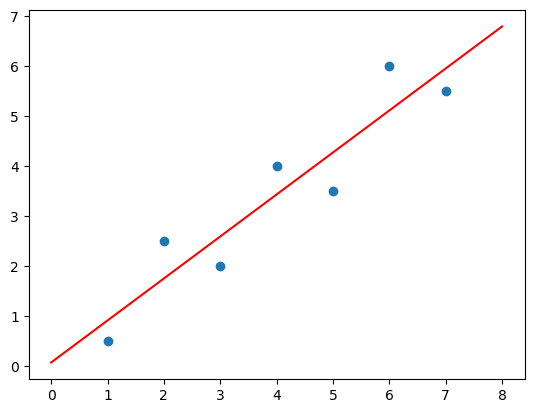

In [21]:
X_l = np.linspace(0,8,100)
Y_l = beta0 + beta1*X_l
plt.scatter(X,Y)
plt.plot(X_l,Y_l, "r");

### Some Definitions

#### Standard Diviation in Data

If n is the number of data points then the standard deviation of the data is defined as:
$$
S_y = \sqrt{\frac{\sum _{i=1}^n (y_i - \bar{y})}{n-1}}
$$

#### Standard Error

This is defined as:
$$
S_{y/x} = \sqrt{\frac{\sum_{i=1}^n(y_i-a_0-a_1 x_i)^2}{n-2}}
$$

#### Correlation Coefficient

This is defined as:
$$
r = \frac{n\sum x_i y_i - (\sum x_i)(\sum y_i)}{\sqrt{n\sum x_i^2 - (\sum x_i)^2}\sqrt{n\sum y_i^2 - (\sum y_i)^2}}
$$

<blockquote>
Based on above definitions, we can define some criterion for determining if the data is linear or not.

If $S_{y/x} < S_y$, the fit is acceptable.

If $r=1$, the data is completely linear error is zero.

If $r=0$, the data is completely non-linear.
</blockquote>

For the linear fit above. We get:

0.7734431367038469

In [33]:
#SY
n = len(X)
SY = np.sqrt((np.sum((Y-ymean)**2))/(n-1))
SYX = np.sqrt(((Y-beta0-beta1*X)**2).sum()/(n-2))
SY, SYX

(1.9456912102680337, 0.7734431367038469)

We see that $S_{y/x}$ is less than $S_y$ so, the data is *somewhat* linear.

In [35]:
term1 = np.sum(X*Y)
term2 = np.sum(X)*np.sum(Y)
numerator = n*term1 - term2
term3 =  n*np.sum(X**2) - (np.sum(X))**2
term4 = n*np.sum(Y**2) - (np.sum(Y))**2
denominator = np.sqrt((term3*term4))
r = numerator/denominator
r

0.9318356132188194

r is about 0.93, meaning our data is very much linear.

### Making A Function

In [36]:
def linear_regression(X, Y, plot = True, statistics = True):
    """
    Linear regression using the least squares method.

    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the linear regression model.
    stats : dict
        Statistics of the linear regression model.
        `r` : correlation coefficient
        `sy` : Standard Deviation of data
        `syx` : standard error of the estimate
    """
    xmean = np.mean(X)
    ymean = np.mean(Y)
    variane = np.sum((X-xmean)**2)
    beta1 = np.sum((X-xmean)*(Y-ymean))/variane
    beta0 = ymean - beta1*xmean
    beta = np.array([beta0, beta1])

    if plot:
        X_l = np.linspace(np.mean(X)-3*np.std(X), np.mean(X)+3*np.std(X), 100)
        Y_l = beta0 + beta1*X_l
        plt.figure(figsize=(10,8))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    
    if statistics:
        n = len(X)
        SY = np.sqrt((np.sum((Y-ymean)**2))/(n-1))
        SYX = np.sqrt(((Y-beta0-beta1*X)**2).sum()/(n-2))

        term1 = np.sum(X*Y)
        term2 = np.sum(X)*np.sum(Y)
        numerator = n*term1 - term2
        term3 =  n*np.sum(X**2) - (np.sum(X))**2
        term4 = n*np.sum(Y**2) - (np.sum(Y))**2
        denominator = np.sqrt((term3*term4))
        r = numerator/denominator
        stats = {"r": r, "SY": SY, "SYX": SYX}
        return beta, stats
    else:
        return beta

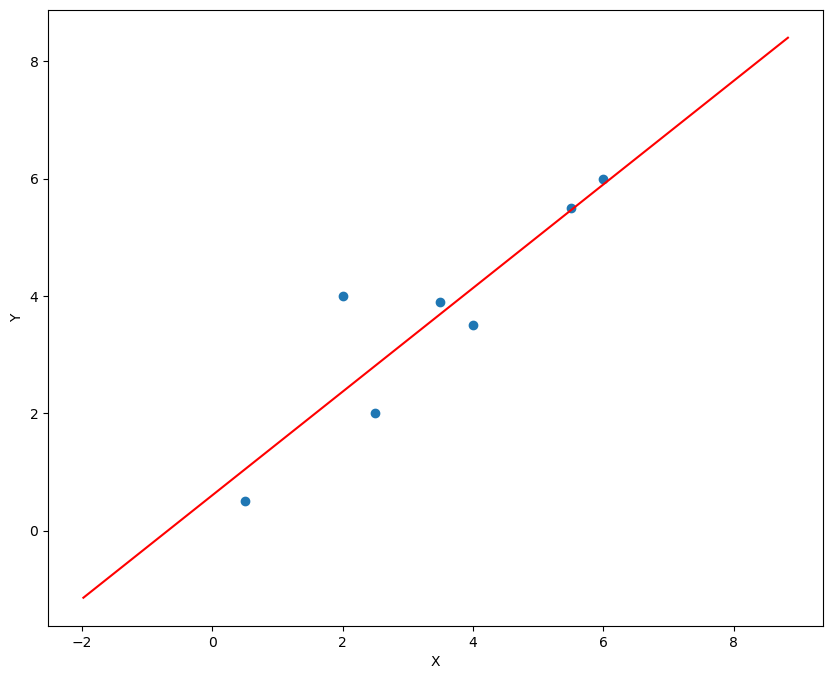

In [37]:
X = np.array([0.5,2.5,2.0,4,3.5,6,5.5])
Y = np.array([0.5,2.0,4,3.5,3.9,6,5.5])
beta, stats = linear_regression(X, Y, plot = True, statistics = True)

In [38]:
beta, stats

(array([0.6       , 0.88333333]),
 {'r': 0.9017846558134516,
  'SY': 1.9058806238536958,
  'SYX': 0.9023118455759442})

## Polynomial Regression

Unlike linear regression, a polynomial regression uses non-linear relationships between the variables. A second order polynomial is defined as:
$$
y = a_0 + a_1 x + a_2 x^2 + \epsilon
$$
We have to optimize the sum of residuals:
$$
\begin{align*}
RSS &= \sum_{i=1}^n (y_i - \hat{y_i})^2\\
 &= \sum_{i=1}^n(y_i -a_0 - a_1 x_i - a_2 x_i^2) \\
\end{align*}
$$

By differentiating this with respect to $a_0, a_1 \text{and } a_2$, we can show that:
$$
\begin{align*}
na_0 &+ &\left( \sum_{i=1}^n x_i\right) a_1 + &\left(\sum_{i=1}^n x_i^2\right)a_2 &= &\sum _{i=1}^n y_i\\
\left( \sum_{i=1}^n x_i\right) a_0 &+ &\left(\sum_{i=1}^n x_i^2\right)a_1 + &\left(\sum_{i=1}^n x_i^3\right)a_2 &= &\sum _{i=1}^n x_iy_i\\
\left( \sum_{i=1}^n x_i^2\right) a_0 &+ &\left(\sum_{i=1}^n x_i^3\right)a_1 + &\left(\sum_{i=1}^n x_i^4\right)a_2 &= &\sum _{i=1}^n x_i^2y_i\\
\end{align*}
$$

We can solve this using matrix algebra.

The standard error and correlation coefficient in this case are:
$$
S_{y/x} = \sqrt{\frac{\sum_{i=1}^n(y_i-a_0 -a_1 x_i -a_2 x_i^2}{n-(m+1)}}\\
S_{y/x} = \sqrt{\frac{S_r}{n-(m+1)}}
$$
m being the order of the polynomial, here 2.

The correlation coefficient is:
$$
r^2 = \frac{\sum_{i=1}^n (y_i - \bar{y})^2-S_r}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

### Example

In [44]:
X = np.array([0,1,2,3,4,5])
Y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
n = len(X)
m = 2
xi = np.sum(X)
xi2 = np.sum(X**2)
xi3 = np.sum(X**3)
xi4 = np.sum(X**4)
yi = np.sum(Y)
xiyi = np.sum(X*Y)
xi2yi = np.sum(X**2*Y)
xmean = np.mean(X)
ymean = np.mean(Y)

#The matix
A = np.array([[n, xi, xi2], [xi, xi2, xi3], [xi2, xi3, xi4]])
B = np.array([yi, xiyi, xi2yi])

#Solving for a0, a1, a2
coefficients = np.linalg.solve(A,B)
a0 = coefficients[0]
a1 = coefficients[1]
a2 = coefficients[2]
a0, a1, a2


(2.4785714285714056, 2.3592857142857397, 1.8607142857142813)

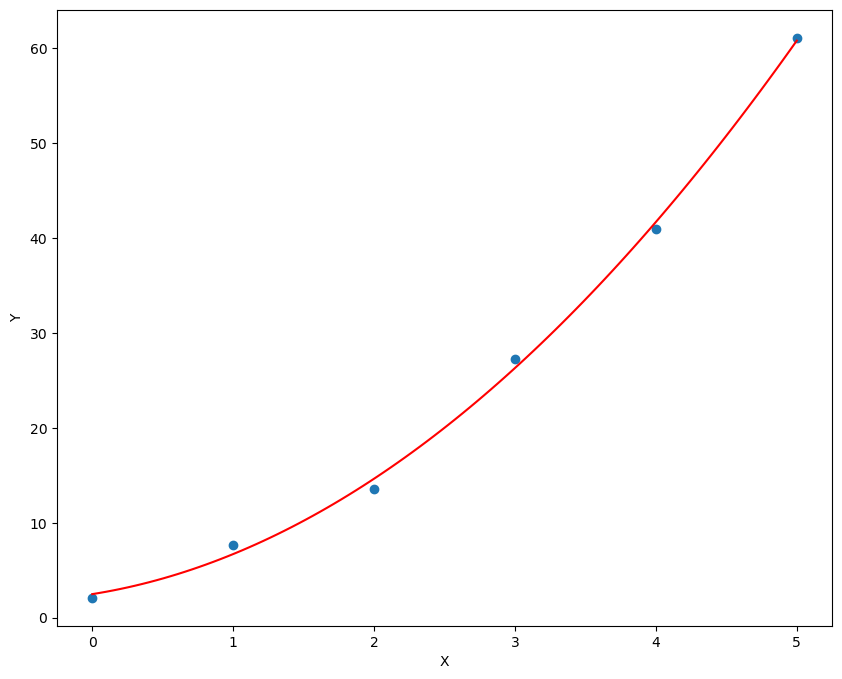

In [45]:
X_l = np.linspace(X.min(), X.max(), 100)
Y_l = a0 + a1*X_l + a2*X_l**2
plt.figure(figsize=(10,8))
plt.scatter(X,Y)
plt.plot(X_l,Y_l, "r")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Statistics

In [51]:
#Sr
Sr = np.sum((Y-a0-a1*X-a2*X**2)**2)
SYX = np.sqrt(Sr/(n-m-1))
#r2
r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
SYX, r2

(1.1175227706213167, 0.9985093572984048)

### Making A Function

In [52]:
def poly_regression_2d(X, Y, plot = True, statistics = True):
    """
    Polynomial regression of order two using the least squares method.
    
    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the polynomial regression model.
    stats : dict
        Statistics of the polynomial regression model.
        `r2` : square of correlation coefficient
        `syx` : standard error of the estimate
    """
    n = len(X)
    m = 2
    xi = np.sum(X)
    xi2 = np.sum(X**2)
    xi3 = np.sum(X**3)
    xi4 = np.sum(X**4)
    yi = np.sum(Y)
    xiyi = np.sum(X*Y)
    xi2yi = np.sum(X**2*Y)
    xmean = np.mean(X)
    ymean = np.mean(Y)

    #The matix
    A = np.array([[n, xi, xi2], [xi, xi2, xi3], [xi2, xi3, xi4]])
    B = np.array([yi, xiyi, xi2yi])

    #Solving for a0, a1, a2
    coefficients = np.linalg.solve(A,B)
    a0 = coefficients[0]
    a1 = coefficients[1]
    a2 = coefficients[2]
    beta = np.array([a0, a1, a2])

    if plot:
        X_l = np.linspace(np.mean(X)-3*np.std(X),np.mean(X)+3*np.std(X), 100)
        Y_l = a0 + a1*X_l + a2*X_l**2
        plt.figure(figsize=(10,8))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    if statistics:
        Sr = np.sum((Y-a0-a1*X-a2*X**2)**2)
        SYX = np.sqrt(Sr/(n-m-1))
        r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
        stats = {"r2": r2, "syx": SYX}
        return beta, stats
    else:
        return beta

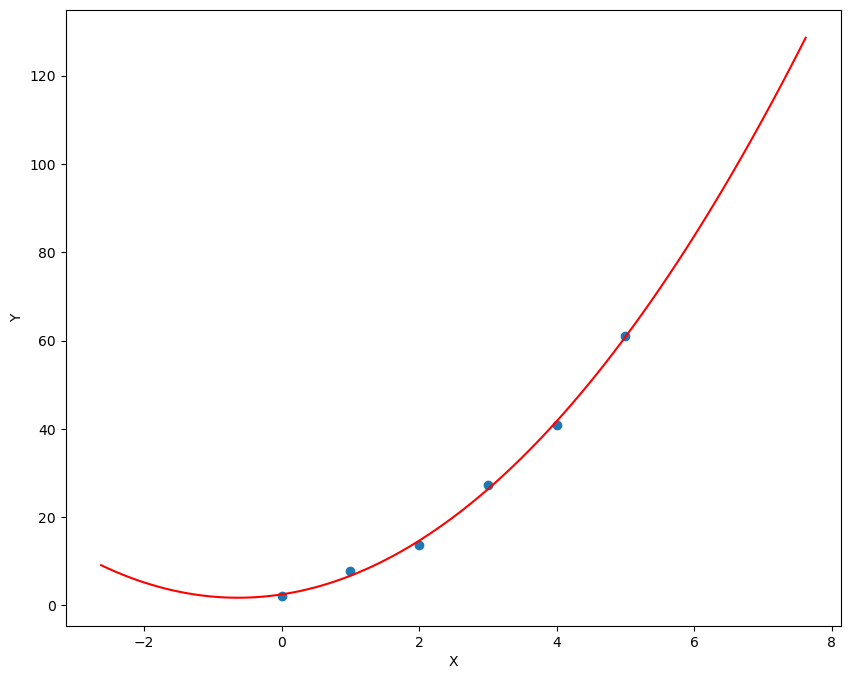

In [53]:
X = np.array([0,1,2,3,4,5])
Y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
beta, stats = poly_regression_2d(X, Y, plot = True, statistics = True)

In [54]:
beta, stats

(array([2.47857143, 2.35928571, 1.86071429]),
 {'r2': 0.9985093572984048, 'syx': 1.1175227706213167})

### Generalizing Polynomial Regression to $m^{th}$ Order

A polynomial of $m^{th}$ order is defined as:
$$
y = a_0 + a_1 x + a_2 x^2 + \dots + a_m x^m + \epsilon
$$

The coefficients can be determined using the following equation:
$$
\begin{align*}
na_0 &+ &\left( \sum_{i=1}^n x_i\right) a_1 + &\left(\sum_{i=1}^n x_i^2\right)a_2 &+ \cdots &+\left(\sum_{i=1}^n x_i^{m}\right)a_m &= &\sum _{i=1}^n y_i\\
\left( \sum_{i=1}^n x_i\right) a_0 &+ &\left(\sum_{i=1}^n x_i^2\right)a_1 + &\left(\sum_{i=1}^n x_i^3\right)a_2 &+ \cdots &+\left(\sum_{i=1}^n x_i^{m+1}\right)a_m &= &\sum _{i=1}^n x_iy_i\\
\vdots \\
\left( \sum_{i=1}^n x_i^{m}\right) a_0 &+ &\left(\sum_{i=1}^n x_i^{m+1}\right)a_1 + &\left(\sum_{i=1}^n x_i^{m+2}\right)a_2 &+ \cdots &+\left(\sum_{i=1}^n x_i^{2m}\right)a_m &= &\sum _{i=1}^n x_i^{m}y_i\\
\end{align*}
$$


#### Implementing Polynomial Regression

In [3]:
X = np.arange(0, 10, 0.5)
Y = np.sin(X)
n = len(X)

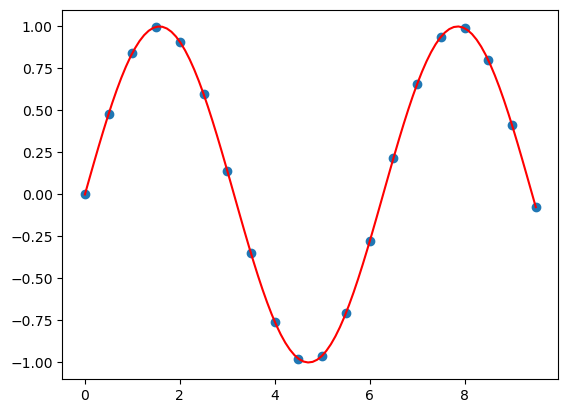

In [28]:
m = 10
Xis = np.zeros(2*m+1)
Yis = np.zeros(m+1)
for i in range(0, 2*m+1):
    if i ==0:
        Xis[i] = n
        continue
    xi = np.sum(X**i)
    Xis[i] = xi
    
for i in range(1, m+2):
    yi = np.sum(Y*(X**(i-1)))
    Yis[i-1] = yi
A = np.zeros((m+1, m+1))
for i in range(0, m+1):
    A[i] = Xis[i:i+m+1]

coefficients = np.linalg.solve(A,Yis)
X_l = np.linspace(X.min(), X.max(), 100)
def predict(X_l):
    Y_l = 0
    for i in range(0, m+1):
        Y_l += coefficients[i]*X_l**i
    return Y_l
Y_l = predict(X_l)

plt.scatter(X,Y)
plt.plot(X_l,Y_l, "r");

#### Statistics

In [30]:
#Sr
xmean = np.mean(X)
ymean = np.mean(Y)
y_pred = predict(X)
Sr = np.sum((Y-y_pred)**2)
SYX = np.sqrt(Sr/(n-m-1))
#r2
r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
SYX, r2

(6.238970351706717e-05, 0.9999999959659528)

#### Making A Function

In [11]:
def poly_regression(X, Y, order=3, plot=True, stats = True):
    """
    Polynomial regression of order m using least squares method.
    
    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    order : int, optional
        Order of the polynomial. Default is 3.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the polynomial regression model.
    stats : dict
        Statistics of the polynomial regression model.
        `r2` : square of correlation coefficient
        `syx` : standard error of the estimate
    """
    Xis = np.zeros(2*order+1)
    Yis = np.zeros(order+1)
    n=len(X)
    # m=order
    for i in range(0, 2*order+1):
        if i ==0:
            Xis[i] = n
            continue
        xi = np.sum(X**i)
        Xis[i] = xi
        
    for i in range(1, order+2):
        yi = np.sum(Y*(X**(i-1)))
        Yis[i-1] = yi
    A = np.zeros((order+1, order+1))
    for i in range(0, order+1):
        A[i] = Xis[i:i+order+1]
    beta = np.linalg.solve(A,Yis)

    if plot:
        X_l = np.linspace(np.min(X)-np.std(X),np.max(X)+np.std(X), 100)
        def predict(X_l):
            Y_l = 0
            for i in range(0, order+1):
                Y_l += beta[i]*X_l**i
            return Y_l
        Y_l = predict(X_l)
        plt.figure(figsize=(10,8))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlim(np.min(X)-np.std(X),np.max(X)+np.std(X))
        plt.ylim(np.min(Y)-np.std(Y),np.max(Y)+np.std(Y))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show();

    if stats:
        xmean = np.mean(X)
        ymean = np.mean(Y)
        y_pred = predict(X)
        Sr = np.sum((Y-y_pred)**2)
        SYX = np.sqrt(Sr/(n-order-1))
        #r2
        r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
        stats = {"r2": r2, "syx": SYX}
        return beta, stats
    else:
        return beta
    

In [12]:
plt.rcdefaults()

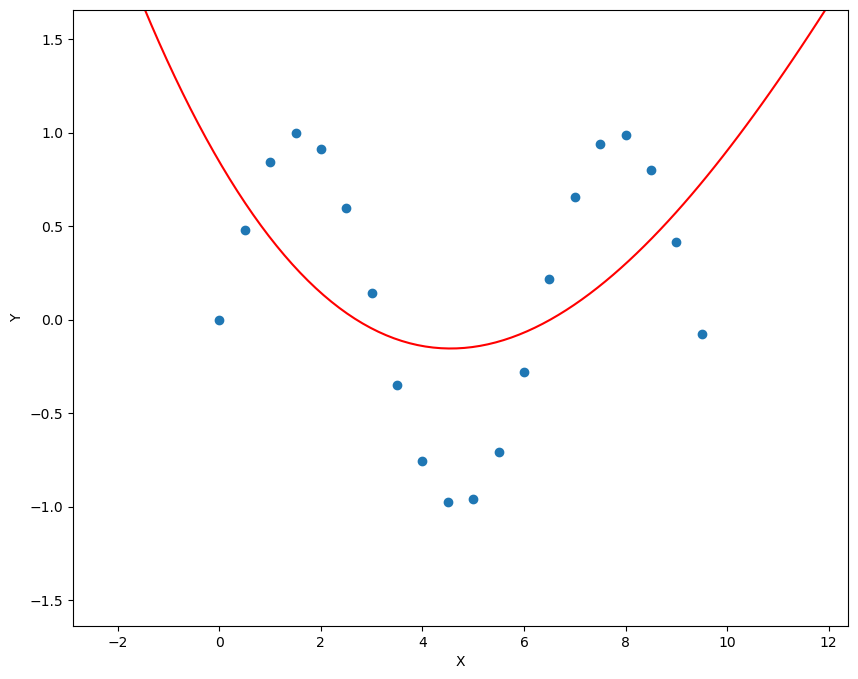

(array([ 0.84337312, -0.46409544,  0.05947396, -0.00124773]),
 {'r2': 0.2209706831786263, 'syx': 0.6502503513847545})

In [13]:
poly_regression(X, Y, order=3, plot=True, stats = True)

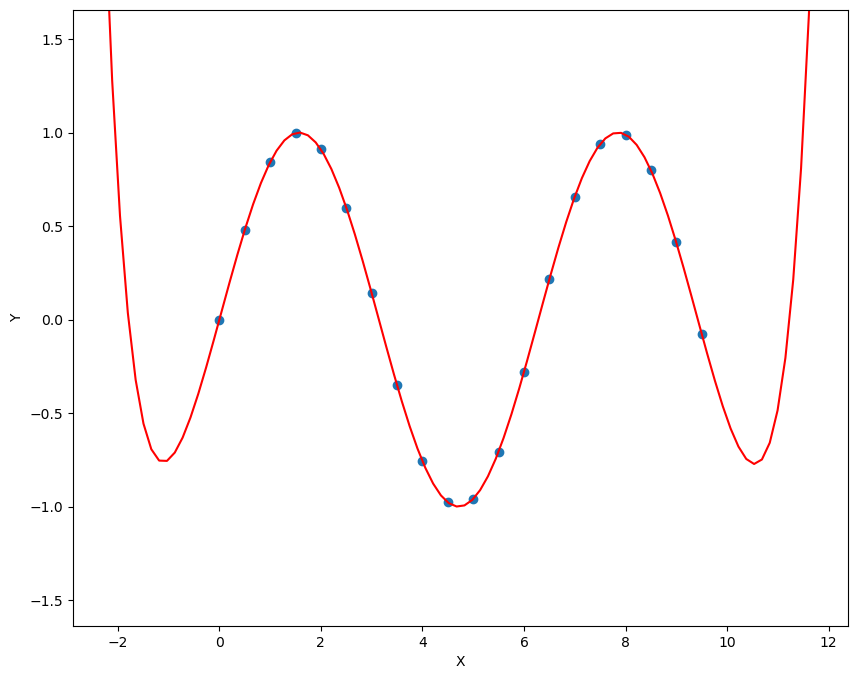

(array([ 2.11999611e-06,  9.96632280e-01,  1.55187116e-02, -1.94178848e-01,
         2.55432248e-02, -5.73009175e-03,  4.86197895e-03, -1.27007133e-03,
         1.45909761e-04, -7.93574637e-06,  1.68321186e-07]),
 {'r2': 0.9999999959659528, 'syx': 6.238970351706717e-05})

In [41]:
poly_regression(X, Y, order=10, plot=True, stats = True)

## Nonlinear Regression